In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [8]:
mice_eeg1 = pd.read_csv('pw3_data/EEG_mouse_data_1.csv')
mice_eeg2 = pd.read_csv('pw3_data/EEG_mouse_data_2.csv')
mice_eeg = pd.concat([mice_eeg1, mice_eeg2])

mice_test = pd.read_csv("pw3_data/EEG_mouse_data_test.csv")

In [18]:
# Dataset avec les 25 valeurs + 1 pour les états
mice25features = mice_eeg.iloc[:,:26]

In [21]:
# Instanciez un objet StandardScaler
scaler = StandardScaler()

# Normalisez les données
mice25features.iloc[:,1:] = scaler.fit_transform(mice25features.iloc[:,1:])

# TODO Normalisation mice_test ? Me semble pas  

,state,amplitude_around_1_Hertz,amplitude_around_2_Hertz,amplitude_around_3_Hertz,amplitude_around_4_Hertz,amplitude_around_5_Hertz,amplitude_around_6_Hertz,amplitude_around_7_Hertz,amplitude_around_8_Hertz,amplitude_around_9_Hertz,...,amplitude_around_16_Hertz,amplitude_around_17_Hertz,amplitude_around_18_Hertz,amplitude_around_19_Hertz,amplitude_around_20_Hertz,amplitude_around_21_Hertz,amplitude_around_22_Hertz,amplitude_around_23_Hertz,amplitude_around_24_Hertz,amplitude_around_25_Hertz
0,n,-0.209955,-0.081998,-0.105121,-0.027861,0.818127,-0.239219,0.668757,-0.127320,0.709286,...,-0.326857,-0.356923,-0.429006,1.140943,1.497041,0.046292,1.045339,1.018279,2.308318,-0.662605
1,n,-0.183434,-0.325791,-0.230518,0.068381,0.740384,0.553920,1.392473,-0.100262,0.099354,...,-0.263410,0.893280,0.874745,-0.827062,0.216172,1.456953,0.229637,0.251268,-0.836158,0.351154
2,n,-0.143389,3.683546,1.390184,0.315788,0.036759,-0.564602,-0.180452,-0.749074,-0.457418,...,0.445116,1.615055,-0.109746,-0.307976,-0.182265,-0.280723,-0.591587,-0.804733,-0.645389,-0.896221
3,w,-0.443261,0.947062,2.070365,0.140069,-0.510886,-0.573552,-0.637377,-0.471410,-0.465943,...,0.407986,-0.464970,-0.617177,-0.840480,-0.856213,-0.643038,-0.397374,-0.864120,0.409522,-0.228425
4,w,-0.187587,-0.238456,-0.177577,0.177870,0.570556,0.723715,0.226759,1.182129,0.829106,...,1.182209,1.349163,2.324057,0.887388,-0.209855,1.142469,2.040669,0.382839,-0.144823,0.428831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20600,w,0.400910,-0.465757,-0.525052,-0.807413,-0.632842,-0.988416,-0.660521,-0.169737,0.303584,...,-0.573303,-0.666623,0.781411,-0.048987,-0.186201,0.445578,0.911238,0.726102,-0.479693,-0.414771
20601,w,0.088067,1.395769,0.017206,-0.266756,0.473237,-0.580393,-0.153533,0.002277,-0.078438,...,-0.774449,-0.755074,0.153395,0.532664,1.352395,0.177002,0.731621,0.018491,0.828907,0.893462
20602,w,0.069926,0.802343,1.185003,-0.230130,0.477894,-1.038101,0.260310,-0.922477,-0.297760,...,-0.428413,-0.679883,-0.341300,-0.172039,-0.301467,-1.141953,0.024624,-1.162420,-1.148965,-0.941198
20603,w,-0.062429,-0.085349,0.375933,0.233367,-0.482447,0.239207,-0.258372,0.548183,-0.597124,...,-0.602944,0.369762,-0.685941,-0.665577,-0.454082,-0.698300,-0.812527,0.107169,-0.094350,0.637469


In [67]:
# Preparation donnée
# On sépare les valeurs du resultat pour pouvoir utiliser dans le K-fold
mice25features_input = mice25features.iloc[:,1:]
mice25features_output = mice25features['state']

# Remplacement des valeurs car le model n'aime pas les char
mice25features_output = mice25features_output.replace('w',0).replace('n',1).replace('r',1)


In [68]:
import keras
from keras import layers
from sklearn.model_selection import KFold

#Création des 3 folds
keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

# On affiche juste les folds
for i, (train_index, test_index) in enumerate(kf.split(mice25features_input)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")


Fold 0:
  Train: index=[    0     2     3 ... 40860 40861 40862]
  Test:  index=[    1     8    15 ... 40854 40856 40857]
Fold 1:
  Train: index=[    0     1     4 ... 40859 40860 40862]
  Test:  index=[    2     3     5 ... 40855 40858 40861]
Fold 2:
  Train: index=[    1     2     3 ... 40857 40858 40861]
  Test:  index=[    0     4     6 ... 40859 40860 40862]


In [64]:
#Création du model
def create_model():
  mlp = keras.Sequential([
      layers.Input(25),
      layers.Dense(32, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),
      loss="mse",
  )

  return mlp

mlp = create_model()
print(mlp.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                832       
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
history_list = []
trained_mlp = []

for i, (train_index, test_index) in enumerate(kf.split(mice25features_input)):

  mlp = create_model()

  history = mlp.fit(
      x=mice25features_input.iloc[train_index], y=mice25features_output.iloc[train_index],
      validation_data=(mice25features_input.iloc[test_index], mice25features_output.iloc[test_index]),
      epochs=10
  )

  history_list.append(history)
  trained_mlp.append(mlp)

Epoch 1/10
852/852 [==============================] - 5s 5ms/step - loss: 0.1531 - val_loss: 0.1049
Epoch 2/10
852/852 [==============================] - 4s 5ms/step - loss: 0.1088 - val_loss: 0.1319
Epoch 3/10
852/852 [==============================] - 2s 3ms/step - loss: 0.1114 - val_loss: 0.1105
Epoch 4/10
852/852 [==============================] - 5s 6ms/step - loss: 0.1154 - val_loss: 0.0968
Epoch 5/10
852/852 [==============================] - 4s 5ms/step - loss: 0.0993 - val_loss: 0.0923
Epoch 6/10
852/852 [==============================] - 3s 3ms/step - loss: 0.0930 - val_loss: 0.0874
Epoch 7/10
852/852 [==============================] - 2s 3ms/step - loss: 0.0981 - val_loss: 0.1201
Epoch 8/10
852/852 [==============================] - 4s 4ms/step - loss: 0.0980 - val_loss: 0.0887
Epoch 9/10
852/852 [==============================] - 3s 3ms/step - loss: 0.0935 - val_loss: 0.0860
Epoch 10/10
852/852 [==============================] - 3s 3ms/step - loss: 0.0980 - val_loss: 0.0883

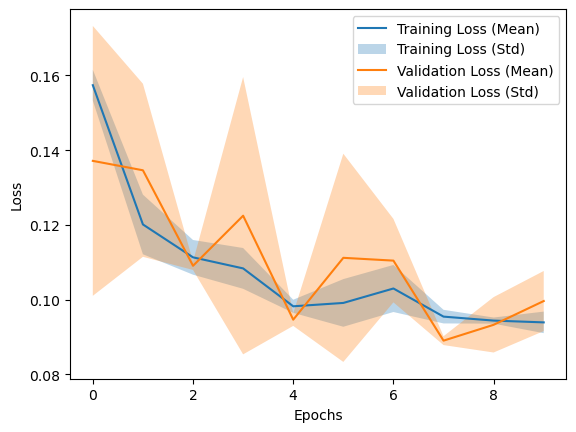

In [66]:
# Affichage des graphiques pour loss
import numpy as np
import matplotlib.pyplot as pl

train_losses = np.array([history.history['loss'] for history in history_list])
val_losses = np.array([history.history['val_loss'] for history in history_list])

# Calculate mean and standard deviation for training and validation losses
mean_train_loss = np.mean(train_losses, axis=0)
std_train_loss = np.std(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)
std_val_loss = np.std(val_losses, axis=0)

# Plot mean and standard deviation for training loss
pl.plot(mean_train_loss, label='Training Loss (Mean)')
pl.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.3, label='Training Loss (Std)')

# Plot mean and standard deviation for validation loss
pl.plot(mean_val_loss, label='Validation Loss (Mean)')
pl.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.3, label='Validation Loss (Std)')

# Add labels and legend
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.legend()

# Display the plot
pl.show()

426/426 [==============================] - 1s 2ms/step


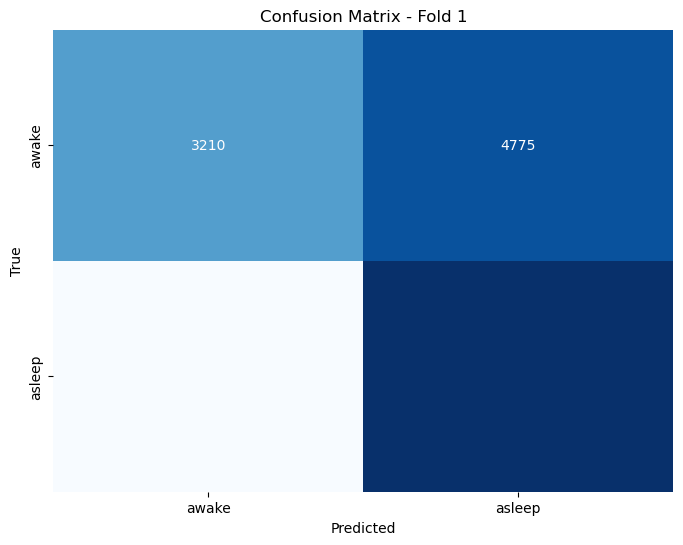

F1 Score - Fold 1: 0.6896161107614852
426/426 [==============================] - 1s 2ms/step


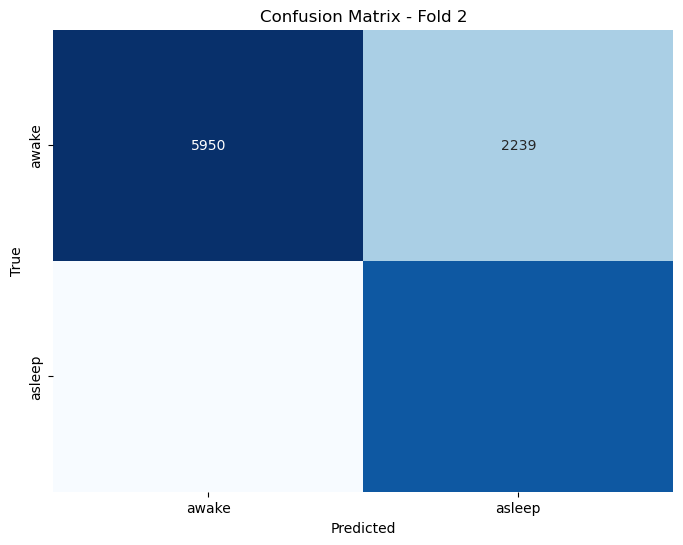

F1 Score - Fold 2: 0.7964226876912215
426/426 [==============================] - 1s 3ms/step


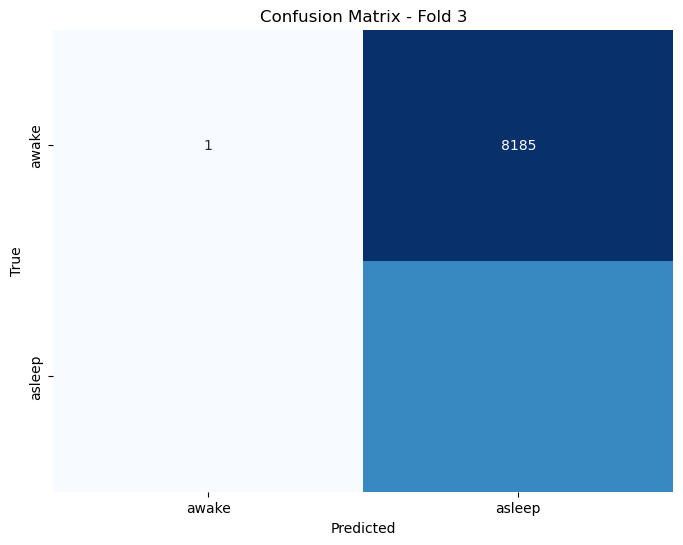

F1 Score - Fold 3: 0.5704539490947258


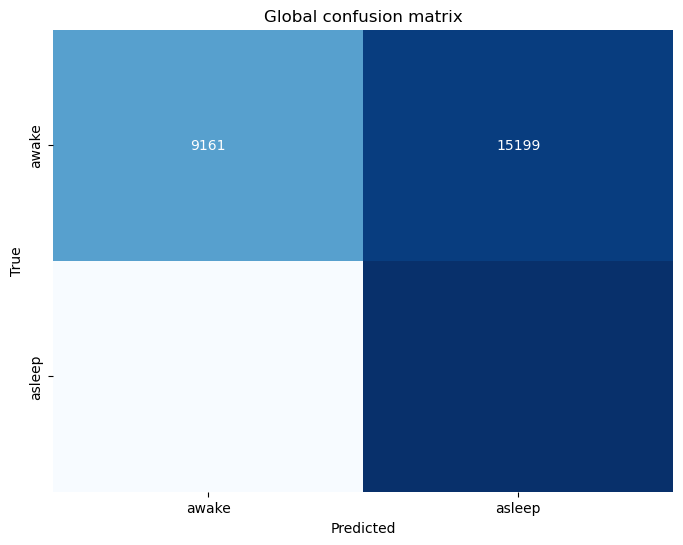

Mean F1 Score across all folds: 0.6854975825158108


In [76]:
# TODO ça marche pas :/
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, title):
    # Plot confusion matrix
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["awake", "asleep"], yticklabels=["awake", "asleep"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()

f1_scores = []
mean_confusion_matrix = np.zeros((2, 2))

for i, (train_index, test_index) in enumerate(kf.split(mice25features_input)):
    # Evaluate the trained model on the test fold
    predictions = (trained_mlp[i].predict(mice25features_input.iloc[test_index]) > 0).astype(int)
    true_labels = (mice25features_output.iloc[test_index] > 0).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    mean_confusion_matrix += confusion_matrix(true_labels, predictions)

    # Compute confusion matrix and plot
    plot_confusion_matrix(cm, f'Confusion Matrix - Fold {i + 1}')

    # Compute F1 score
    f1 = f1_score(true_labels, predictions)
    f1_scores.append(f1)
    print(f"F1 Score - Fold {i + 1}: {f1}")

# Plot mean confusion matrix
plot_confusion_matrix(mean_confusion_matrix, 'Global confusion matrix')

# Calculate and display the mean F1 score across all folds
mean_f1_score = np.mean(f1_scores)
print(f"Mean F1 Score across all folds: {mean_f1_score}")